### Introduction
__Business problem__

Our company is keen on investing in the movie industry. We have decided to create a new movie studio but do not know anything about creating movies. We are tasked with exploring the types of films currently doing the best at the box office. We must then translate those findings into actionable insights that the head of our company's new movie studio can use to help decide what type of films to create.


## Project Goals
- **Examine** historical box office performance across various genres, budgets, revenues and release dates.  
- **Identify** key trends that contribute to a movie’s commercial success.  
- **Recommend** data-driven strategies to guide the creation and marketing of new films.

### Data Understanding
The data source for this aanalysis was gotten tn.movie_budgets.csv

We will:
- Import the relevant libraries
- Load the data into a dataframe
- Explore and extract data for my analysis
- Data Visualization interpratation
- Provide Recommendations

## __Import libraries__

In [6]:
import pandas as pd
import csv
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr 

__Load Data__


Create a data frame named movie_budgets

In [19]:

movie_budgets = pd.read_csv('tn.movie_budgets.csv', index_col=0 )
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [23]:
movie_gross = pd.read_csv('bom.movie_gross.csv', index_col=0 )
movie_gross.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


## Data Cleaning


In [82]:
# finding missing value for movie_budgets
missing_value = movie_budgets.isna().sum()/len(movie_budgets)*100
missing_value

release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
foreign_gross        0.0
profit               0.0
profit_billions      0.0
roi                  0.0
foreign_profit       0.0
domestic_profit      0.0
release_month        0.0
dtype: float64

In [84]:
# finding missing value for movie_gross
missing_value = movie_gross.isna().sum()/len(movie_gross)*100
missing_value

studio             0.148104
domestic_gross     0.829384
foreign_gross     39.662322
year               0.000000
dtype: float64

In [86]:
# find duplicates for movie_budgets
movie_budgets.duplicated().sum()

0

In [88]:
# find duplicates for movie_gross
movie_gross.duplicated().sum()

0

In [33]:
# remove duplicates
movie_gross.drop_duplicates(keep='first', inplace=True)

In [35]:
# proof there are no more duplicates
movie_gross.duplicated().any()

False

In [37]:
# Convert our strings to numeric values
currency_columns = ['worldwide_gross', 'domestic_gross' , 'production_budget']

currency_columns = ['worldwide_gross', 'domestic_gross', 'production_budget']
movie_budgets[currency_columns] = (
    movie_budgets[currency_columns]
    .replace(r'[\$,]', '', regex=True)
    .apply(pd.to_numeric))

In [39]:
# create foreign gross column

movie_budgets['foreign_gross'] = movie_budgets['worldwide_gross'] - movie_budgets['domestic_gross']
print(movie_budgets.head())

    release_date                                        movie  \
id                                                              
1   Dec 18, 2009                                       Avatar   
2   May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
3    Jun 7, 2019                                 Dark Phoenix   
4    May 1, 2015                      Avengers: Age of Ultron   
5   Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

    production_budget  domestic_gross  worldwide_gross  foreign_gross  
id                                                                     
1           425000000       760507625       2776345279     2015837654  
2           410600000       241063875       1045663875      804600000  
3           350000000        42762350        149762350      107000000  
4           330600000       459005868       1403013963      944008095  
5           317000000       620181382       1316721747      696540365  


## Exploratory Data Analysis



__Most Profitable Movie Genres__

We are looking at the most profitable movie genres of all time

In [43]:
# create profit column

movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']
print(movie_budgets.head())

    release_date                                        movie  \
id                                                              
1   Dec 18, 2009                                       Avatar   
2   May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
3    Jun 7, 2019                                 Dark Phoenix   
4    May 1, 2015                      Avengers: Age of Ultron   
5   Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

    production_budget  domestic_gross  worldwide_gross  foreign_gross  \
id                                                                      
1           425000000       760507625       2776345279     2015837654   
2           410600000       241063875       1045663875      804600000   
3           350000000        42762350        149762350      107000000   
4           330600000       459005868       1403013963      944008095   
5           317000000       620181382       1316721747      696540365   

        profit  
id             

In [45]:
# top 10 most profitable movies

most_profitable = movie_budgets.sort_values(by='profit', ascending=False).head(10)
most_profitable

,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279
43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1548844451,2008208395
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1369318718,1748134200
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1116648995,1747311220
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,996584239,1433854864
67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1165715774,1328722794
27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,894656350,1292935897
61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,960500000,1216693157
42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,648198658,1148258224


In [90]:
# Convert the 'profit' column from millions to billions
movie_budgets['profit_billions'] = movie_budgets['profit'] / 1_000_000_000
movie_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit,profit_billions,roi,foreign_profit,domestic_profit,release_month
id,,,,,,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2015837654,2351345279,2.351345,5.532577,1590837654,335507625,12
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875,0.635064,1.546673,394000000,-169536125,5
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,107000000,-200237650,-0.200238,-0.572108,-243000000,-307237650,6
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963,1.072414,3.243841,613408095,128405868,5
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747,0.999722,3.153696,379540365,303181382,12
...,...,...,...,...,...,...,...,...,...,...,...,...
78,2018-12-31,Red 11,7000,0,0,0,-7000,-0.000007,-1.000000,-7000,-7000,12
79,1999-04-02,Following,6000,48482,240495,192013,234495,0.000234,39.082500,186013,42482,4
80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,0,-3662,-0.000004,-0.732400,-5000,-3662,7


__10 most profitable movies__

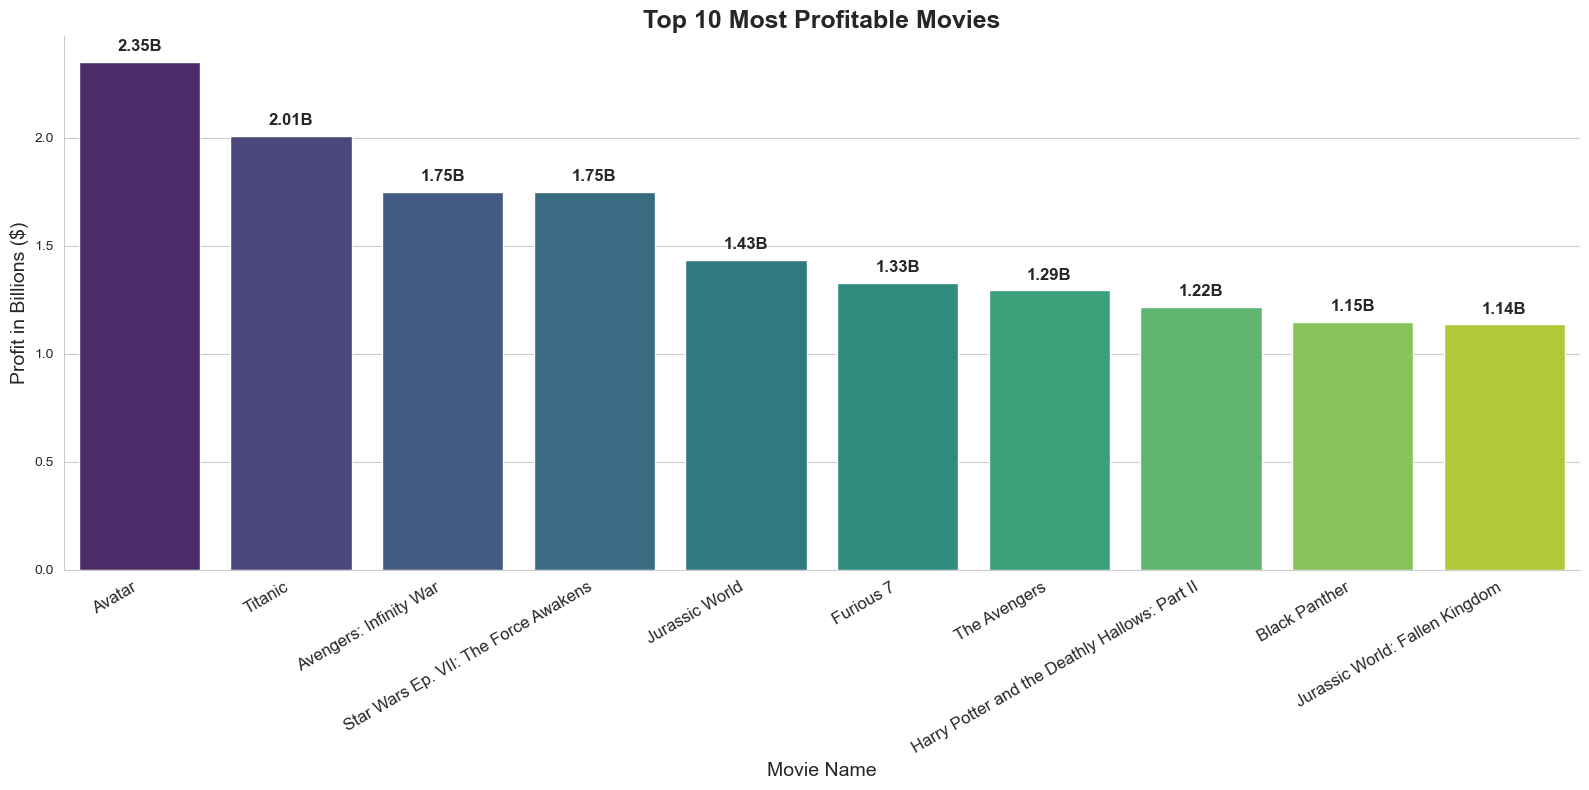

In [106]:

sns.set_style("whitegrid")


plt.figure(figsize=(16, 8))


ax = sns.barplot(
    data=most_profitable, 
    x="movie", 
    y="profit_billions", 
    hue="movie",  
    palette="viridis", 
    legend=False  
)


for index, value in enumerate(most_profitable["profit_billions"]):
    ax.text(index, value + 0.05, f"{value:.2f}B", ha="center", fontsize=12, fontweight="bold")


plt.title("Top 10 Most Profitable Movies", fontsize=18, fontweight="bold")
plt.ylabel("Profit in Billions ($)", fontsize=14)
plt.xlabel("Movie Name", fontsize=14)


plt.xticks(rotation=30, ha="right", fontsize=12)


sns.despine()


plt.tight_layout()
plt.show()




Conclusion: The most profitable genre is Action Sci-Fi

__Return on Investment(ROI)__

We are looking at the movies with highest return on investments


In [110]:

# Calculate ROI

movie_budgets["roi"] = (movie_budgets["profit"] / movie_budgets["production_budget"]) 

# Show top 5 movies by ROI
print(movie_budgets.sort_values("roi", ascending=False).head())

   release_date                    movie  production_budget  domestic_gross  \
id                                                                            
46   1972-06-30              Deep Throat              25000        45000000   
14   1980-03-21                  Mad Max             200000         8750000   
93   2009-09-25      Paranormal Activity             450000       107918810   
80   2015-07-10              The Gallows             100000        22764410   
7    1999-07-14  The Blair Witch Project             600000       140539099   

    worldwide_gross  foreign_gross     profit  profit_billions          roi  \
id                                                                            
46         45000000              0   44975000         0.044975  1799.000000   
14         99750000       91000000   99550000         0.099550   497.750000   
93        194183034       86264224  193733034         0.193733   430.517853   
80         41656474       18892064   41556474      

### Visualisation


Conclusion: high ROI means strong audience interest and/or repeat viewing or great marketing
while low ROI means poor reception, low audience engagement or poor marketing

__Analysing between foreign and domestic audience trends__

We are analysing the most profitable audience

In [115]:
#analyzing between foreign and domestic audience trends, the most profitable audience
#foreign profit margin
movie_budgets['foreign_profit'] = movie_budgets['foreign_gross'] - movie_budgets['production_budget']
movie_budgets['domestic_profit'] = movie_budgets['domestic_gross'] - movie_budgets['production_budget']

# Compare Average Foreign and Domestic Profit
profit_comparison = movie_budgets[["foreign_profit", "domestic_profit"]].mean()
# Display Profit Comparison Values
print(profit_comparison)

foreign_profit     1.802638e+07
domestic_profit    1.028557e+07
dtype: float64


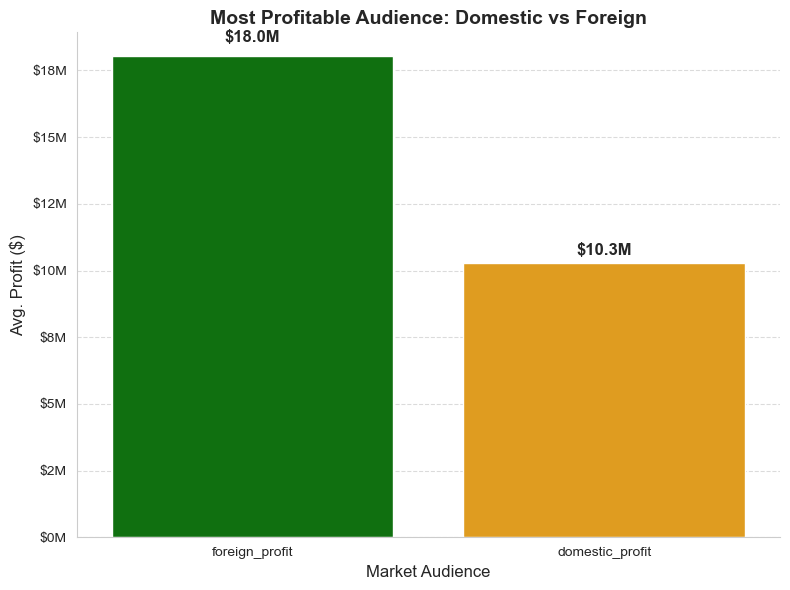

In [123]:
sns.set_style("whitegrid")


plt.figure(figsize=(8,6))


ax = sns.barplot(
    data=profit_comparison.reset_index(), 
    x="index", 
    y=0, 
    hue="index",  
    palette=["green", "orange"], 
    legend=False  
)


for index, value in enumerate(profit_comparison.values):
    ax.text(index, value + 0.03 * value, f"${value/1e6:,.1f}M", ha="center", fontsize=12, fontweight="bold")


plt.xlabel("Market Audience", fontsize=12)
plt.ylabel("Avg. Profit ($)", fontsize=12)
plt.title("Most Profitable Audience: Domestic vs Foreign", fontsize=14, fontweight="bold")


ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x/1e6:,.0f}M"))


plt.grid(axis="y", linestyle="--", alpha=0.7)


sns.despine()


plt.tight_layout()
plt.show()


 Conclusion: Foreign markets are more profitable than domostic markets. This is because foreign profit is significantly higher than domestic profit. This means movies make more money internationally

__Relase Month vs Revenue__

We are analysing how the month a movie is released affects revenue

In [65]:
# Convert release_date to datetime and extract month
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])
movie_budgets['release_month'] = movie_budgets['release_date'].dt.month

# Group by month and calculate mean revenue
monthly_revenue = movie_budgets.groupby('release_month')['worldwide_gross'].mean().reset_index()
monthly_revenue

,release_month,worldwide_gross
0,1,4.656382e+07
1,2,7.154453e+07
2,3,8.063337e+07
3,4,5.992026e+07
4,5,1.622680e+08
5,6,1.425230e+08
6,7,1.409636e+08
7,8,6.097841e+07
8,9,4.669369e+07
9,10,4.946456e+07


In [67]:
# Arrange worldwide_gross in descending order
monthly_revenue = monthly_revenue.sort_values(by='worldwide_gross',ascending=False)
monthly_revenue

,release_month,worldwide_gross
4,5,1.622680e+08
5,6,1.425230e+08
6,7,1.409636e+08
10,11,1.357416e+08
11,12,1.016932e+08
2,3,8.063337e+07
1,2,7.154453e+07
7,8,6.097841e+07
3,4,5.992026e+07
9,10,4.946456e+07


C:\Users\USER\AppData\Local\Temp\ipykernel_8336\1610366053.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_revenue, x='release_month', y='worldwide_gross', palette='viridis')


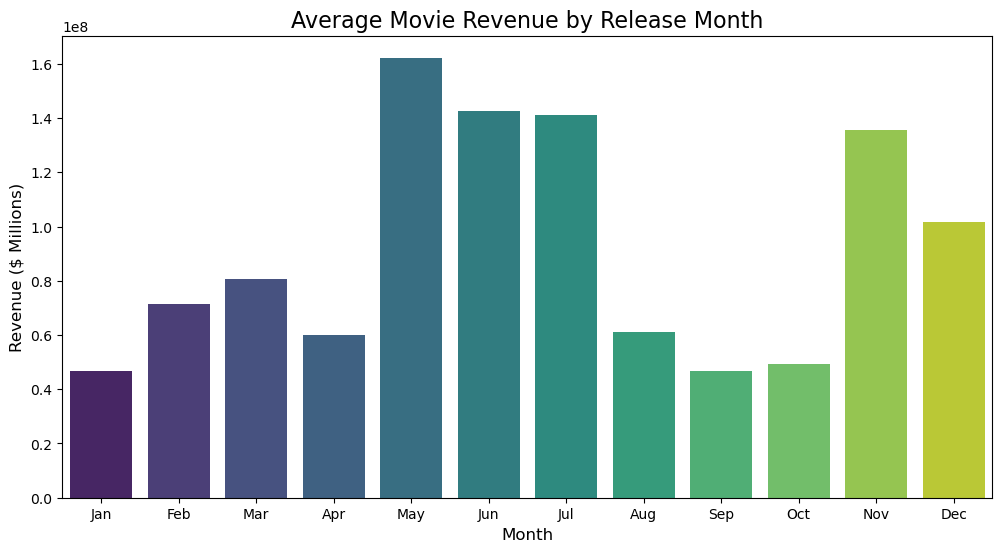

In [69]:
# visualise 
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_revenue, x='release_month', y='worldwide_gross', palette='viridis')
plt.title("Average Movie Revenue by Release Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue ($ Millions)", fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

 Conclusion: Movies do well in summer and holiday seasons which are May to July and November to December respectively


__Correlation Between Budget and Revenue__

We are analysing the correlation betweer production_budget and worldwide_grossrevenue

Correlation Coefficient (R-value): 0.7483059765694755


Text(0.5, 1.0, 'Correlation Between Budget')

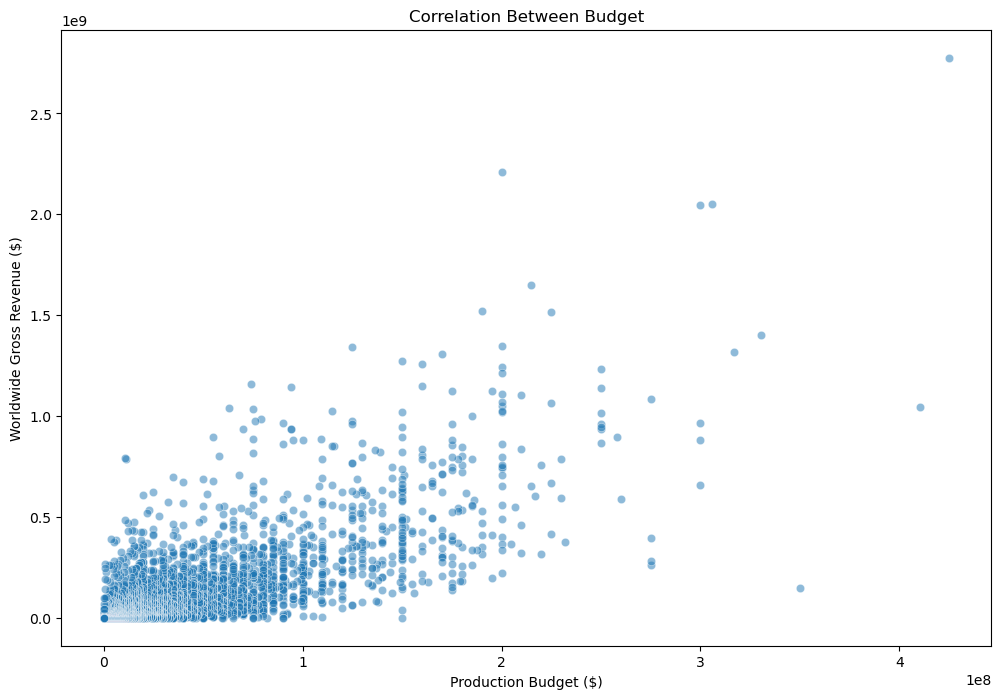

In [73]:
# Analyze correlation between Production Budget and Worldwide Gross Revenue
correlation_coefficient, p_value = pearsonr(movie_budgets["production_budget"], movie_budgets["worldwide_gross"])
print(f"Correlation Coefficient (R-value): {correlation_coefficient}")

# Scatter plot to visualize correlation
plt.figure(figsize=(12,8))
sns.scatterplot(x=movie_budgets["production_budget"], y=movie_budgets["worldwide_gross"], alpha=0.5)
plt.xlabel("Production Budget ($)")
plt.ylabel("Worldwide Gross Revenue ($)")
plt.title("Correlation Between Budget")

 Conclusion: Higher budgets may lead to higher revenue. However, it can be affected by other factors like marketing, release time and audience reception

### CONCLUSION

We have explored the movie industry and provided insights for our company interested in launching a new movie studio. 
- We identified that Action / Sci-Fi are the most profitable genres.
- The company should look into creating movies with more foreign appeal
- The company must have enough budget to handle production and marketing, this is because high budget films give good returns but must factor good marketing and release timings.
- The best time to release movies is during holidays and summers and we should also avoid releasing movies alongside popular block busters.
